# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/Documentos/Mestrado/ACOPResults/acopEnv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 12%|█▏        | 5/43 [00:00<00:00, 46.85it/s]

[178, 37, 3062, 2854, 3127, 3466, 3663, 4011, 3906, 3768, 3411, 2748, 2674]
2 chs: 178 entries
3 chs: 37 entries
4 chs: 3062 entries
5 chs: 2854 entries
6 chs: 3127 entries
7 chs: 3466 entries
8 chs: 3663 entries
9 chs: 4011 entries
10 chs: 3906 entries
15 chs: 3768 entries
20 chs: 3411 entries
30 chs: 2748 entries
40 chs: 2674 entries


 93%|█████████▎| 40/43 [00:04<00:00,  7.39it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 23%|██▎       | 10/43 [00:00<00:02, 14.38it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 98%|█████████▊| 42/43 [00:05<00:00,  8.13it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:04<00:00,  8.43it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 15.49it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 93%|█████████▎| 40/43 [00:04<00:00,  7.98it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 93%|█████████▎| 40/43 [00:04<00:00,  7.07it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 15.32it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:03<00:01,  5.75it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:04<00:00,  7.10it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:04<00:00,  8.87it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 17.21it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:04<00:00,  6.95it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:04<00:00,  9.33it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]


sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict)

{'LassoCV': 18.678170728300973, 'ElasticNetCV': 18.685901901184508, 'GradientBoostingRegressor': 18.72121575442138, 'Ridge': 18.728053288075976, 'PoissonRegressor': 18.728505309138157}


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGainBoxPlots(data):
    plt.boxplot(data)
    plt.ylabel("Mean Absolute error (dB)", fontsize = 8)
    
    plt.suptitle("Gain Test error", fontsize = 16)
    plt.legend(strategyArray, handlelength = 0, bbox_to_anchor=(1.6, 1), loc = "right")

    plt.show()

def plotLossBoxPlots(data):
    plt.boxplot(data)
    plt.ylabel("Mean Absolute error (dB)", fontsize = 8)
    
    plt.suptitle("Loss Test error", fontsize = 16)
    plt.legend(strategyArray, handlelength = 0, bbox_to_anchor=(1.6, 1), loc = "right")

    plt.show()

# Building the models

In [5]:
X, y = data.loadDataset()
X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = 0)

count = 1

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor

extra_tree = ExtraTreeRegressor(criterion = "mse", random_state=0)
model      = MultiOutputRegressor(BaggingRegressor(base_estimator = extra_tree, 
                                                   n_estimators   = 100,
                                                   random_state   = 0))

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - BaggingRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.46307957  0.54757859 18.36971426  1.02359122 22.36775417  2.11361887
 21.79422855  1.54989642]


In [7]:
from sklearn.linear_model import LassoCV

model = MultiOutputRegressor(LassoCV())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - LassoCV".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.71904685  0.68301426 18.44272641  1.2583458  22.43827506  2.44351913
 21.9022987   1.51763112]


In [8]:
from sklearn.linear_model import ElasticNetCV

model = MultiOutputRegressor(ElasticNetCV())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - ElasticNetCV".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.78908904  0.67534911 18.63576807  1.24973636 22.42417198  2.50190305
 21.91666501  1.49061909]


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

model = MultiOutputRegressor(GradientBoostingRegressor())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - GradientBoostingRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.5922744   0.58350216 18.27150957  1.04660135 22.3096196   2.21716638
 21.83244731  1.56879631]


In [10]:
from xgboost import XGBRegressor

model = MultiOutputRegressor(XGBRegressor())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - XGBRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.565382    0.56536555 18.260962    1.0435636  22.304388    2.2174153
 21.82615     1.5650264 ]


In [11]:
from sklearn.dummy import DummyRegressor

model = MultiOutputRegressor(DummyRegressor())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - DummyRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [21.44345238  4.13988095 21.91964286  1.60416667 22.89880952  1.78571429
 21.08630952  1.58928571]


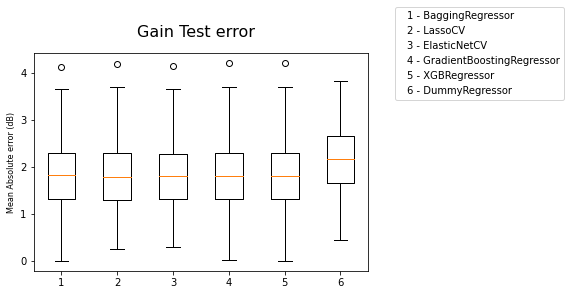

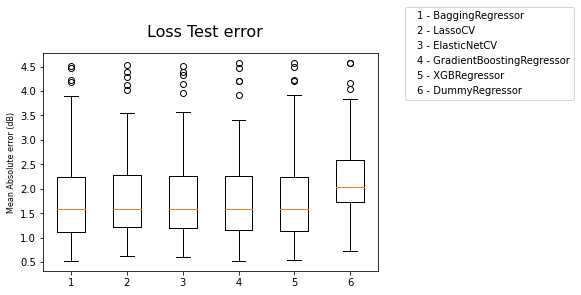

In [12]:
plotGainBoxPlots(errorArray[0])
plotLossBoxPlots(errorArray[1])